In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import metrics
import pycaret
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import sMAPE, smape_loss

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

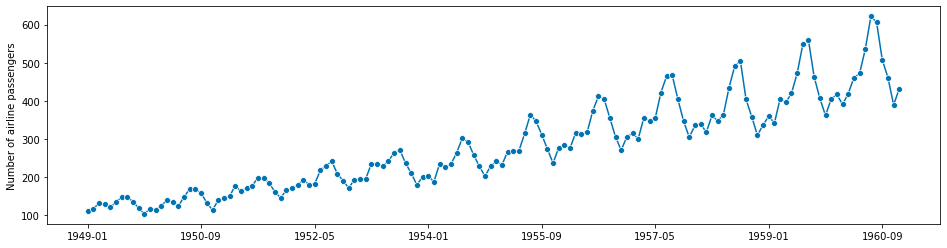

In [2]:
y = get_data('airline', verbose=False)
plot_series(y)

In [3]:
fh = np.arange(1,13)
fold = 3

# Available Models

In [4]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12)
exp.models()

,Description,Value
0,session_id,4592
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


,Name,Reference,Turbo
ID,,,
naive,Naive Forcaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forcaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False


# Flow example

## Common Setup

In [5]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


In [6]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.get_config("y_test")

## Manual Create

### Classical Statistical Models

,MAE,RMSE,MAPE,SMAPE
0,14.5613,352.5322,0.0366,0.0376
1,15.5549,332.1290,0.0420,0.0411
2,20.2153,501.1830,0.0479,0.0494
Mean,16.7772,395.2814,0.0422,0.0427
SD,2.4647,75.3456,0.0046,0.0049


0.0216

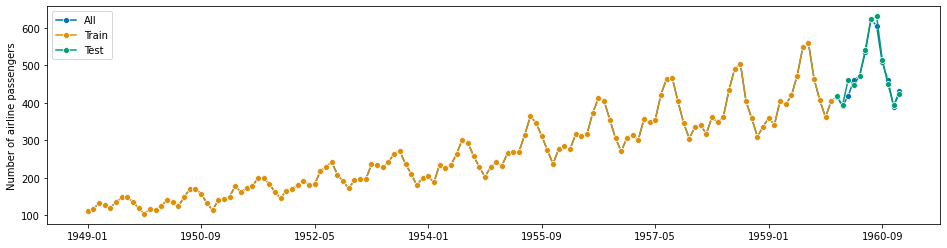

In [7]:
model = exp.create_model("exp_smooth")
y_predict = exp.predict_model(model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

In [8]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,MAE,RMSE,MAPE,SMAPE
0,10.5620,182.1899,0.0272,0.0273
1,26.2572,903.9130,0.0738,0.0704
2,11.2644,179.8604,0.0261,0.0265
Mean,16.0279,421.9878,0.0424,0.0414
SD,7.2389,340.7739,0.0222,0.0205


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='mul', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


In [9]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,MAE,RMSE,MAPE,SMAPE
0,10.5620,182.1899,0.0272,0.0273
1,26.2572,903.9130,0.0738,0.0704
2,11.2644,179.8604,0.0261,0.0265
Mean,16.0279,421.9878,0.0424,0.0414
SD,7.2389,340.7739,0.0222,0.0205


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='mul', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


0.0364

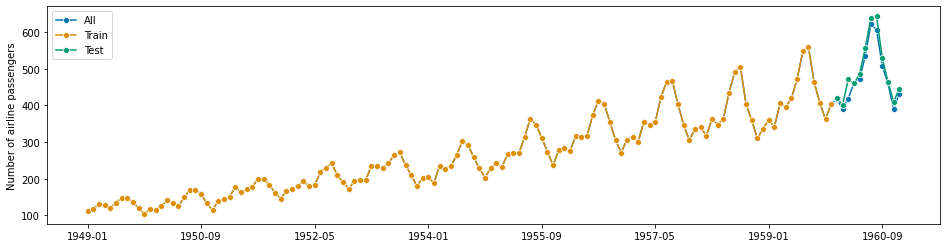

In [10]:
y_predict = exp.predict_model(tuned_model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

In [11]:

# Random Grid Search with different number of iterations
tuned_model = exp.tune_model(model, search_algorithm="random", n_iter=5)
print(model)
print(tuned_model)

,MAE,RMSE,MAPE,SMAPE
0,10.5620,182.1899,0.0272,0.0273
1,26.2572,903.9130,0.0738,0.0704
2,11.2644,179.8604,0.0261,0.0265
Mean,16.0279,421.9878,0.0424,0.0414
SD,7.2389,340.7739,0.0222,0.0205


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='mul', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


### Reduced Regressors: Random Forest (with internal conditional deseasonalize and detrending)

,MAE,RMSE,MAPE,SMAPE
0,28.0638,1611.5346,0.0678,0.0721
1,29.7063,1450.1777,0.0738,0.0748
2,22.8056,1290.5687,0.0470,0.0493
Mean,26.8586,1450.7603,0.0629,0.0654
SD,2.9433,131.0344,0.0115,0.0115


0.0637

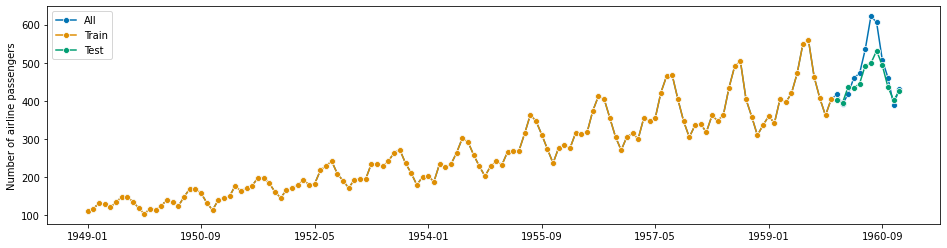

In [12]:
model = exp.create_model("rf_cds_dt")
y_predict = exp.predict_model(model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

In [13]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,MAE,RMSE,MAPE,SMAPE
0,20.1918,682.5538,0.0502,0.0521
1,18.5111,509.3313,0.0496,0.0482
2,18.1008,517.7899,0.0396,0.0405
Mean,18.9346,569.8917,0.0465,0.0470
SD,0.9046,79.7390,0.0049,0.0048


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='multiplicative',
          regresso

In [14]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,MAE,RMSE,MAPE,SMAPE
0,20.1918,682.5538,0.0502,0.0521
1,18.5111,509.3313,0.0496,0.0482
2,18.1008,517.7899,0.0396,0.0405
Mean,18.9346,569.8917,0.0465,0.0470
SD,0.9046,79.7390,0.0049,0.0048


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='multiplicative',
          regresso

0.0532

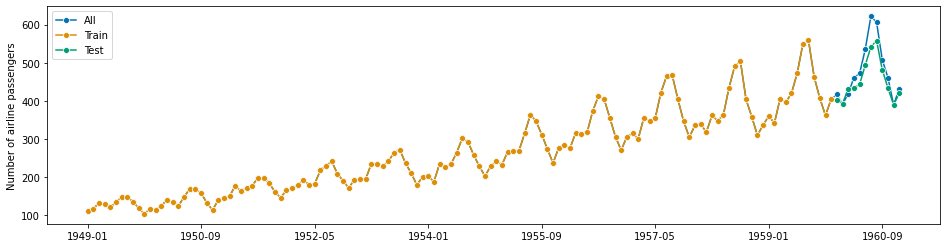

In [15]:
y_predict = exp.predict_model(tuned_model)
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

## Auto Create

### Compare Models

In [16]:
best_baseline_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_baseline_models

,Model,MAE,RMSE,MAPE,SMAPE,TT (Sec)
exp_smooth,Exponential Smoothing,16.7772,395.2814,0.0422,0.0427,0.2167
ets,ETS,17.4165,424.9896,0.0440,0.0445,0.2400
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.5467
auto_arima,Auto ARIMA,21.0297,602.4566,0.0525,0.0531,5.1900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.7233
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,24.8102,1079.7144,0.0613,0.0631,16.2000
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,26.0039,1159.3274,0.0617,0.0639,3.4533
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.5467
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.6500
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.8200,1437.6933,0.0661,0.0686,0.1400


[ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='mul', sp=12,
                      trend='add', use_boxcox=None),
 AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
         start_params=None, trend='add'),
 ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True

In [17]:
compare_metrics = exp.pull()
compare_metrics

,Model,MAE,RMSE,MAPE,SMAPE,TT (Sec)
exp_smooth,Exponential Smoothing,16.7772,395.2814,0.0422,0.0427,0.2167
ets,ETS,17.4165,424.9896,0.0440,0.0445,0.2400
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.5467
auto_arima,Auto ARIMA,21.0297,602.4566,0.0525,0.0531,5.1900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.7233
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonali...,24.8102,1079.7144,0.0613,0.0631,16.2000
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & De...,26.0039,1159.3274,0.0617,0.0639,3.4533
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.5467
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.6500
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.8200,1437.6933,0.0661,0.0686,0.1400


* Note that some models like BATS and TBATS are disabled by default. 
* You can enable them by setting `turbo = False`

In [18]:
# _ = exp.compare_models(fold=fold, sort='smape', n_select=3, turbo=False)

### Tune Best Models

In [19]:
best_tuned_models = [exp.tune_model(model) for model in best_baseline_models]
best_tuned_models

,MAE,RMSE,MAPE,SMAPE
0,13.2626,277.8525,0.0331,0.0339
1,19.1686,455.3259,0.0530,0.0513
2,21.1925,551.0621,0.0491,0.0506
Mean,17.8746,428.0802,0.0451,0.0453
SD,3.3642,113.1890,0.0086,0.0080


[ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='add', sp=12,
                      trend='add', use_boxcox=True),
 AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='mul', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='add', sp=12,
         start_params=None, trend='mul'),
 ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True

### Blend Best Models

#### Mean Blender

In [20]:
mean_blender = exp.blend_models(best_tuned_models, method='mean')

,MAE,RMSE,MAPE,SMAPE
0,9.5083,172.9445,0.0236,0.0239
1,25.9006,807.3813,0.0723,0.0692
2,14.3404,275.5478,0.0329,0.0337
Mean,16.5831,418.6245,0.0429,0.0422
SD,6.8775,278.0656,0.0211,0.0195


0.023

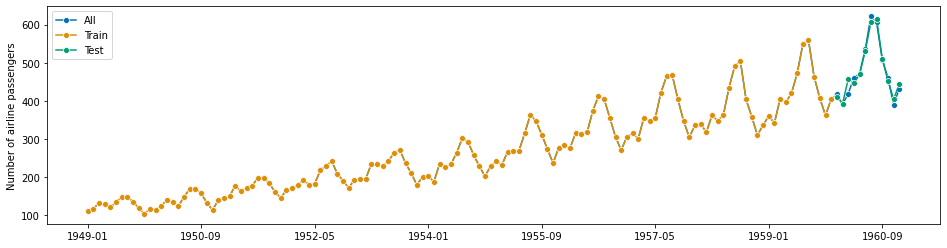

In [21]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.predict_model(mean_blender)
plot_series(y, y_train, y_test[0], labels=['All', 'Train', 'Test'])
round(smape_loss(y_test[0], y[y_test.index]), 4)

#### Median Blender

In [22]:
median_blender = exp.blend_models(best_tuned_models, method='median')

,MAE,RMSE,MAPE,SMAPE
0,11.0069,210.6685,0.0278,0.0281
1,26.4099,893.9688,0.0741,0.0707
2,13.7388,255.0283,0.0314,0.0320
Mean,17.0519,453.2219,0.0444,0.0436
SD,6.7105,312.1809,0.0210,0.0192


0.025

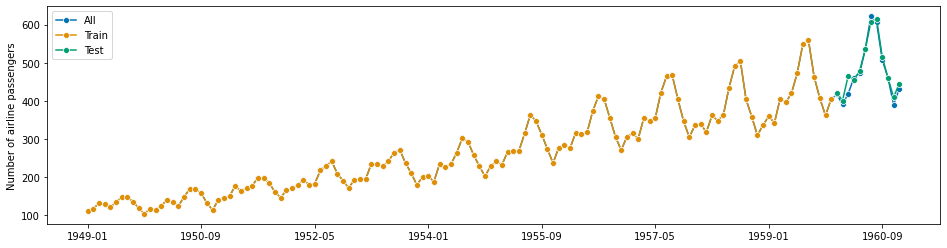

In [23]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.predict_model(median_blender)
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])
round(smape_loss(y_test, y[y_test.index]), 4)

#### Voting Blender

In [24]:
top_model_metrics = compare_metrics.iloc[0:3]['SMAPE']
display(top_model_metrics)

top_model_weights = 1 - top_model_metrics/top_model_metrics.sum()
display(top_model_weights)

exp_smooth    0.0427
ets           0.0445
arima         0.0507
Name: SMAPE, dtype: float64

exp_smooth    0.690355
ets           0.677302
arima         0.632342
Name: SMAPE, dtype: float64

In [25]:
voting_blender = exp.blend_models(best_tuned_models, method='voting', weights=top_model_weights.values)

,MAE,RMSE,MAPE,SMAPE
0,9.4691,171.7097,0.0235,0.0238
1,26.0543,817.2006,0.0727,0.0696
2,14.1938,270.2228,0.0326,0.0333
Mean,16.5724,419.7110,0.0429,0.0422
SD,6.9766,283.9303,0.0214,0.0197


0.0229

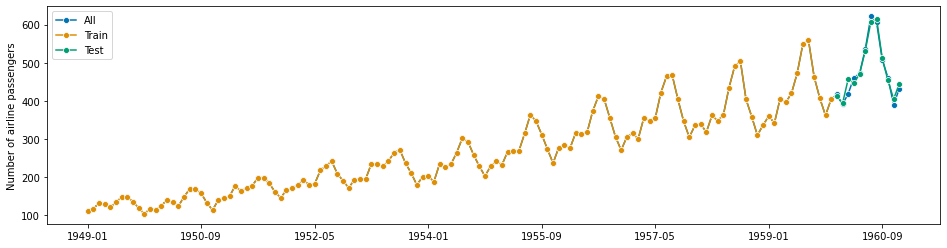

In [26]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.predict_model(voting_blender)
plot_series(y, y_train, y_test[0], labels=['All', 'Train', 'Test'])
round(smape_loss(y_test[0], y[y_test.index]), 4)

## Prediction Customization

In [6]:
model = exp.create_model("auto_arima")

,MAE,RMSE,MAPE,SMAPE
0,12.0769,249.6850,0.0298,0.0305
1,19.4102,462.2028,0.0538,0.0520
2,31.6020,1095.4819,0.0738,0.0769
Mean,21.0297,602.4566,0.0525,0.0531
SD,8.0529,359.2552,0.0180,0.0190


In [7]:
# Default prediction
exp.predict_model(model)

1960-01    419.9672
1960-02    399.8499
1960-03    457.9944
1960-04    444.4742
1960-05    464.7892
1960-06    514.1254
1960-07    587.8042
1960-08    597.0108
1960-09    499.5313
1960-10    442.3597
1960-11    396.4102
1960-12    438.6516
Freq: M, dtype: float64

In [8]:
# With Prediction Interval (default alpha = 0.05)
exp.predict_model(model, return_pred_int=True)

,y_pred,lower,upper
1960-01,419.9672,400.2603,439.6740
1960-02,399.8499,375.7392,423.9605
1960-03,457.9944,429.6697,486.3190
1960-04,444.4742,414.0056,474.9427
1960-05,464.7892,432.7993,496.7790
1960-06,514.1254,481.2385,547.0123
1960-07,587.8042,554.3237,621.2846
1960-08,597.0108,563.1606,630.8610
1960-09,499.5313,465.4410,533.6215
1960-10,442.3597,408.1167,476.6027


In [9]:
# With Prediction Interval (custom alpha = 0.2)
exp.predict_model(model, return_pred_int=True, alpha=0.2)

,y_pred,lower,upper
1960-01,419.9672,407.0816,432.8528
1960-02,399.8499,384.0847,415.6150
1960-03,457.9944,439.4739,476.5149
1960-04,444.4742,424.5519,464.3965
1960-05,464.7892,443.8722,485.7062
1960-06,514.1254,492.6219,535.6290
1960-07,587.8042,565.9125,609.6959
1960-08,597.0108,574.8774,619.1443
1960-09,499.5313,477.2408,521.8217
1960-10,442.3597,419.9694,464.7500


In [10]:
# Increased forecast horizon to 2 years instead of the original 1 year
exp.predict_model(model, fh = np.arange(1, 25))

1960-01    419.9672
1960-02    399.8499
1960-03    457.9944
1960-04    444.4742
1960-05    464.7892
1960-06    514.1254
1960-07    587.8042
1960-08    597.0108
1960-09    499.5313
1960-10    442.3597
1960-11    396.4102
1960-12    438.6516
1961-01    453.0077
1961-02    432.4005
1961-03    490.1513
1961-04    476.3150
1961-05    496.3762
1961-06    545.5087
1961-07    619.0237
1961-08    628.0990
1961-09    530.5139
1961-10    473.2576
1961-11    427.2400
1961-12    469.4268
Freq: M, dtype: float64

In [11]:
# For models that do not produce a prediction interval --> returns NA values
model = exp.create_model("lr_cds_dt")
exp.predict_model(model, return_pred_int=True)

,MAE,RMSE,MAPE,SMAPE
0,38.6824,2032.3867,0.0998,0.1051
1,28.0608,1203.1683,0.0751,0.0734
2,32.1693,1464.4496,0.0737,0.0753
Mean,32.9708,1566.6682,0.0828,0.0846
SD,4.3731,346.1573,0.0120,0.0145


,y_pred,lower,upper
1960-01,433.1925,NaN,NaN
1960-02,414.2470,NaN,NaN
1960-03,394.9755,NaN,NaN
1960-04,374.2084,NaN,NaN
1960-05,431.2220,NaN,NaN
1960-06,493.9331,NaN,NaN
1960-07,527.8974,NaN,NaN
1960-08,512.4796,NaN,NaN
1960-09,456.4409,NaN,NaN
1960-10,436.8202,NaN,NaN


## Types of Window Splitters

### Sliding Window Splitter

In [12]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='sliding')
model = exp.create_model("ets")

,MAE,RMSE,MAPE,SMAPE
0,14.5582,352.4071,0.0366,0.0376
1,16.5507,361.1652,0.0452,0.0441
2,35.6983,1532.8331,0.0808,0.0847
Mean,22.2691,748.8018,0.0542,0.0555
SD,9.5307,554.4054,0.0191,0.0208


### Expanding/Rolling Window

* They are identical

In [13]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expanding')
model = exp.create_model("ets")

,MAE,RMSE,MAPE,SMAPE
0,14.5582,352.4071,0.0366,0.0376
1,16.8005,373.5136,0.0458,0.0447
2,20.8908,549.0481,0.0495,0.0512
Mean,17.4165,424.9896,0.0440,0.0445
SD,2.6217,88.1448,0.0054,0.0055


In [14]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='rolling')
model = exp.create_model("ets")

,MAE,RMSE,MAPE,SMAPE
0,14.5582,352.4071,0.0366,0.0376
1,16.8005,373.5136,0.0458,0.0447
2,20.8908,549.0481,0.0495,0.0512
Mean,17.4165,424.9896,0.0440,0.0445
SD,2.6217,88.1448,0.0054,0.0055


## Error Handling

In [15]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expanding')
except ValueError as error:
    print(error)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:33:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies


Not Enough Data Points, set a lower number of folds or fh
